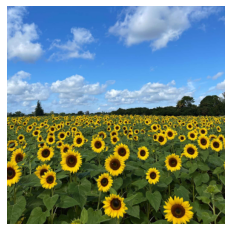

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load the sunflower field image

image_path = 'the_berry_farms_sunflower_field.jpeg'
image_color = cv.imread(str(image_path), cv.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
image_gray = cv.cvtColor(image_color, cv.COLOR_BGR2GRAY) / 255.0

# Show the original image
plt.imshow(cv.cvtColor(image_color, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [3]:
def log_filter(sigma):
    """Generate a Laplacian of Gaussian (LoG) kernel."""
    size = round(3 * sigma) * 2 + 1  # Filter size
    hw = size // 2  # Half-width for centering the filter
    x = np.arange(-hw, hw + 1)
    y = np.arange(-hw, hw + 1)
    X, Y = np.meshgrid(x, y)
    
    log_kernel = ((X**2 + Y**2 - 2*sigma**2) / sigma**4) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    return log_kernel


In [6]:
def find_local_maxima(img_log, threshold=0.09):
    """Detect local maxima in the Laplacian of Gaussian filtered image."""
    coordinates = []
    height, width = img_log.shape
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            region = img_log[i-1:i+2, j-1:j+2]  # 3x3 region
            if img_log[i, j] == np.max(region) and img_log[i, j] >= threshold:
                coordinates.append((i, j))
    return set(coordinates)


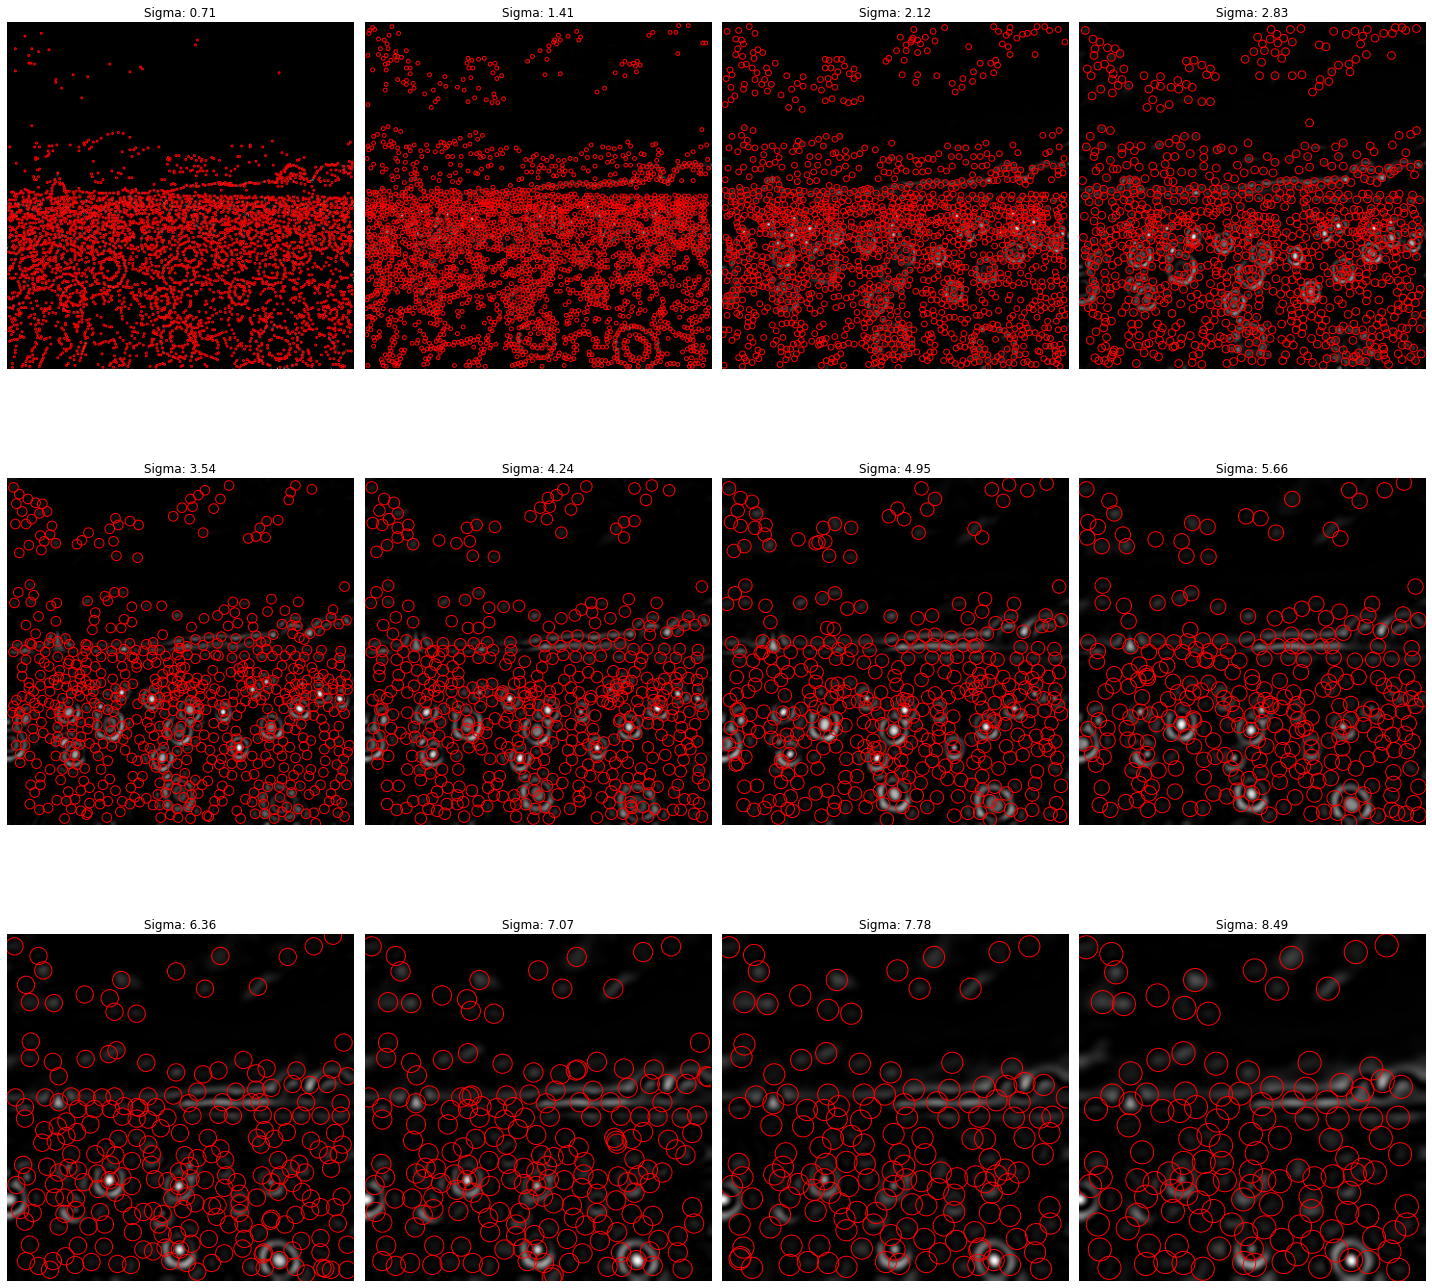

In [7]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))

# Apply LoG filter and detect blobs for varying sigma values
for r, ax in enumerate(axes.flatten(), start=1):
    sigma = r / np.sqrt(2)  # Varying sigma to detect different sizes
    log_kernel = log_filter(sigma)
    
    # Apply the filter to the grayscale image
    filtered_image = cv.filter2D(image_gray, ddepth=-1, kernel=log_kernel)
    filtered_image = np.square(filtered_image)  # Square to emphasize strong responses
    
    # Detect local maxima (potential circle centers)
    coordinates = find_local_maxima(filtered_image, threshold=0.09)
    
    # Display the filtered image
    ax.imshow(filtered_image, cmap='gray')
    ax.set_title(f'Sigma: {sigma:.2f}')
    ax.axis('off')
    
    # Draw circles around detected blobs
    for (x, y) in coordinates:
        circle_radius = sigma * 1.414  # Circle size proportional to sigma
        ax.add_patch(plt.Circle((y, x), circle_radius, color='red', linewidth=1, fill=False))

plt.tight_layout()
plt.show()


In [8]:
largest_circles = []
for r in range(1, 12):
    sigma = r / np.sqrt(2)
    log_kernel = log_filter(sigma)
    
    # Apply the LoG filter
    filtered_image = cv.filter2D(image_gray, ddepth=-1, kernel=log_kernel)
    filtered_image = np.square(filtered_image)
    
    # Detect maxima
    coordinates = find_local_maxima(filtered_image, threshold=0.09)
    
    if coordinates:  # Store the largest circles
        largest_circles.append((sigma, coordinates))

# Report the largest circle parameters
for sigma, coords in largest_circles:
    print(f"Sigma: {sigma:.2f}, Number of Circles: {len(coords)}")
    for (x, y) in coords:
        print(f"Circle at: ({x}, {y}), Radius: {sigma * np.sqrt(2):.2f}")


Sigma: 0.71, Number of Circles: 3899
Circle at: (206, 217), Radius: 1.00
Circle at: (203, 328), Radius: 1.00
Circle at: (218, 191), Radius: 1.00
Circle at: (224, 122), Radius: 1.00
Circle at: (231, 310), Radius: 1.00
Circle at: (318, 315), Radius: 1.00
Circle at: (169, 335), Radius: 1.00
Circle at: (330, 289), Radius: 1.00
Circle at: (256, 74), Radius: 1.00
Circle at: (180, 201), Radius: 1.00
Circle at: (198, 249), Radius: 1.00
Circle at: (214, 77), Radius: 1.00
Circle at: (228, 12), Radius: 1.00
Circle at: (268, 48), Radius: 1.00
Circle at: (334, 30), Radius: 1.00
Circle at: (346, 233), Radius: 1.00
Circle at: (210, 223), Radius: 1.00
Circle at: (196, 325), Radius: 1.00
Circle at: (291, 297), Radius: 1.00
Circle at: (352, 307), Radius: 1.00
Circle at: (343, 344), Radius: 1.00
Circle at: (168, 226), Radius: 1.00
Circle at: (268, 313), Radius: 1.00
Circle at: (274, 244), Radius: 1.00
Circle at: (301, 118), Radius: 1.00
Circle at: (213, 234), Radius: 1.00
Circle at: (206, 109), Radius: 1

new






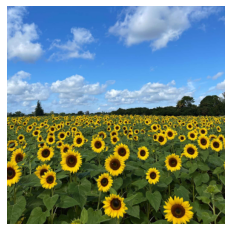

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load the sunflower field image
image_path = 'the_berry_farms_sunflower_field.jpeg'
image_color = cv.imread(str(image_path), cv.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
image_gray = cv.cvtColor(image_color, cv.COLOR_BGR2GRAY) / 255.0

# Show the original image
plt.imshow(cv.cvtColor(image_color, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [12]:
def log_filter(sigma):
    """Generate a Laplacian of Gaussian (LoG) kernel."""
    size = round(3 * sigma) * 2 + 1  # Filter size based on sigma
    hw = size // 2  # Half-width for centering the filter
    x = np.arange(-hw, hw + 1)
    y = np.arange(-hw, hw + 1)
    X, Y = np.meshgrid(x, y)
    
    log_kernel = ((X**2 + Y**2 - 2*sigma**2) / sigma**4) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    return log_kernel


In [14]:
def find_local_maxima(img_log, threshold=0.09):
    """Detect local maxima in the Laplacian of Gaussian filtered image."""
    coordinates = []
    height, width = img_log.shape
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            region = img_log[i-1:i+2, j-1:j+2]  # 3x3 region
            if img_log[i, j] == np.max(region) and img_log[i, j] >= threshold:
                coordinates.append((i, j))
    return set(coordinates)


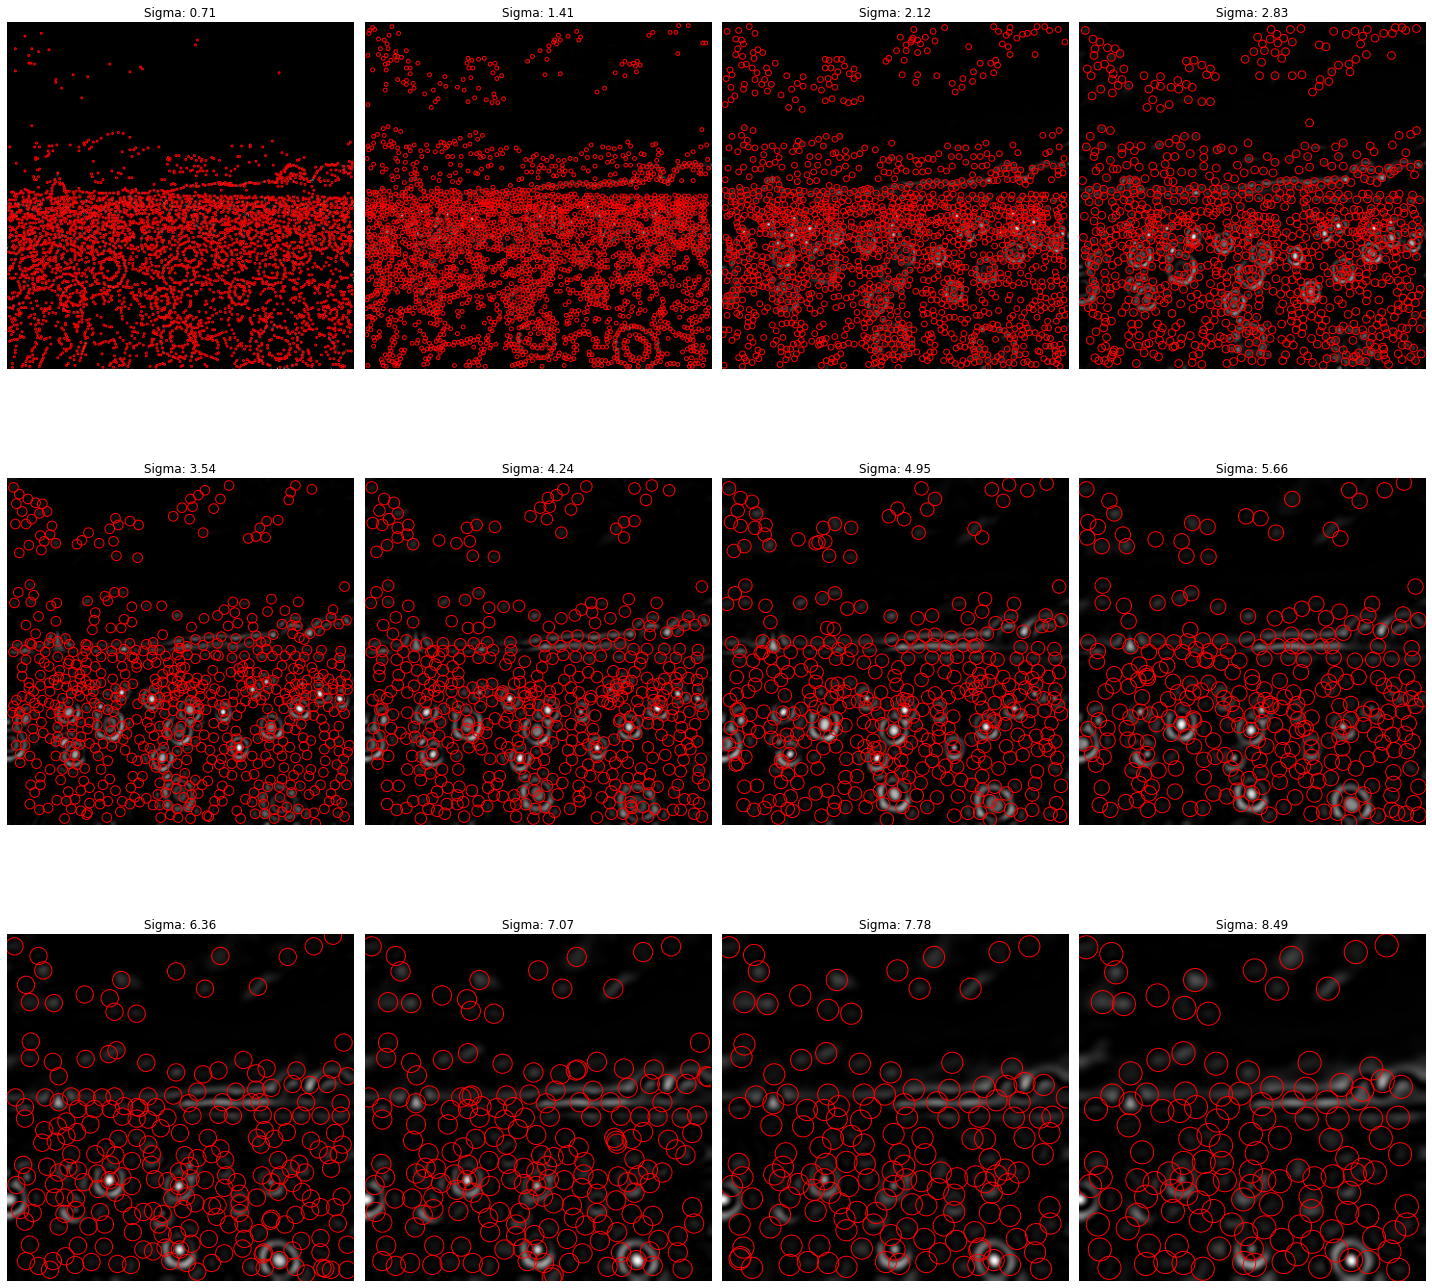

In [15]:
# Create subplots for visualization
fig, axes = plt.subplots(3, 4, figsize=(20, 20))

# Apply LoG filter and detect blobs for varying sigma values
sigma_values = []
for r, ax in enumerate(axes.flatten(), start=1):
    sigma = r / np.sqrt(2)  # Varying sigma to detect different sizes
    sigma_values.append(sigma)
    
    log_kernel = log_filter(sigma)
    
    # Apply the filter to the grayscale image
    filtered_image = cv.filter2D(image_gray, ddepth=-1, kernel=log_kernel)
    filtered_image = np.square(filtered_image)  # Square to emphasize strong responses
    
    # Detect local maxima (potential circle centers)
    coordinates = find_local_maxima(filtered_image, threshold=0.09)
    
    # Display the filtered image
    ax.imshow(filtered_image, cmap='gray')
    ax.set_title(f'Sigma: {sigma:.2f}')
    ax.axis('off')
    
    # Draw circles around detected blobs
    for (x, y) in coordinates:
        circle_radius = sigma * 1.414  # Circle size proportional to sigma
        ax.add_patch(plt.Circle((y, x), circle_radius, color='red', linewidth=1, fill=False))

plt.tight_layout()
plt.show()


In [16]:
largest_circles = []
for r in range(1, 12):
    sigma = r / np.sqrt(2)
    log_kernel = log_filter(sigma)
    
    # Apply the LoG filter
    filtered_image = cv.filter2D(image_gray, ddepth=-1, kernel=log_kernel)
    filtered_image = np.square(filtered_image)
    
    # Detect maxima
    coordinates = find_local_maxima(filtered_image, threshold=0.09)
    
    if coordinates:  # Store the largest circles
        largest_circles.append((sigma, coordinates))

# Report the largest circle parameters
print("Detected Circles and Corresponding Parameters:")
for sigma, coords in largest_circles:
    print(f"Sigma: {sigma:.2f}, Number of Circles: {len(coords)}")
    for (x, y) in coords:
        print(f"Circle at: ({x}, {y}), Radius: {sigma * np.sqrt(2):.2f}")
        
print(f"\nRange of Sigma values used: {sigma_values}")


Detected Circles and Corresponding Parameters:
Sigma: 0.71, Number of Circles: 3899
Circle at: (206, 217), Radius: 1.00
Circle at: (203, 328), Radius: 1.00
Circle at: (218, 191), Radius: 1.00
Circle at: (224, 122), Radius: 1.00
Circle at: (231, 310), Radius: 1.00
Circle at: (318, 315), Radius: 1.00
Circle at: (169, 335), Radius: 1.00
Circle at: (330, 289), Radius: 1.00
Circle at: (256, 74), Radius: 1.00
Circle at: (180, 201), Radius: 1.00
Circle at: (198, 249), Radius: 1.00
Circle at: (214, 77), Radius: 1.00
Circle at: (228, 12), Radius: 1.00
Circle at: (268, 48), Radius: 1.00
Circle at: (334, 30), Radius: 1.00
Circle at: (346, 233), Radius: 1.00
Circle at: (210, 223), Radius: 1.00
Circle at: (196, 325), Radius: 1.00
Circle at: (291, 297), Radius: 1.00
Circle at: (352, 307), Radius: 1.00
Circle at: (343, 344), Radius: 1.00
Circle at: (168, 226), Radius: 1.00
Circle at: (268, 313), Radius: 1.00
Circle at: (274, 244), Radius: 1.00
Circle at: (301, 118), Radius: 1.00
Circle at: (213, 234)

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from skimage.feature import blob_log  # Using blob_log to simplify detection

# Load the image
image_color = cv.imread('/mnt/data/{EC453943-4A9C-413E-BD34-13A763E888A8}.png')
image_gray = cv.cvtColor(image_color, cv.COLOR_BGR2GRAY) / 255.0

# Apply blob detection using Laplacian of Gaussian (LoG)
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=0.1)

# Compute radii in the 3rd column of blobs_log (blobs_log[:, 2])
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

# Create a figure to display the detected blobs with colored circles
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cv.cvtColor(image_color, cv.COLOR_BGR2RGB))

# Generate random colors for each detected blob
colors = plt.cm.hsv(np.linspace(0, 1, len(blobs_log)))

# Loop over the detected blobs and plot each with a corresponding color
for i, blob in enumerate(blobs_log):
    y, x, r = blob
    circ = Circle((x, y), r, color=colors[i], linewidth=2, fill=False)
    ax.add_patch(circ)

plt.title("Colored Circles for Detected Blobs")
plt.axis('off')
plt.show()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log

# Load image
image = cv.imread('/mnt/data/{EC453943-4A9C-413E-BD34-13A763E888A8}.png', cv.IMREAD_GRAYSCALE)

# Normalize image
image_normalized = image / 255.0

# Define sigma range for blob detection
sigma_values = np.linspace(1, 10, 10)

# Create a figure to visualize results
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.ravel()

# Loop through each sigma value and apply blob detection
for i, sigma in enumerate(sigma_values):
    # Perform blob detection using Laplacian of Gaussian (LoG)
    blobs = blob_log(image_normalized, min_sigma=sigma, max_sigma=sigma+1, threshold=0.2)
    
    # Compute radius in the third column of blobs
    blobs[:, 2] = blobs[:, 2] * np.sqrt(2)

    # Plot original image with detected blobs
    axes[i].imshow(image, cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        axes[i].add_patch(c)
    
    axes[i].set_title(f"Sigma: {sigma:.2f}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

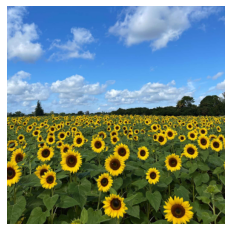

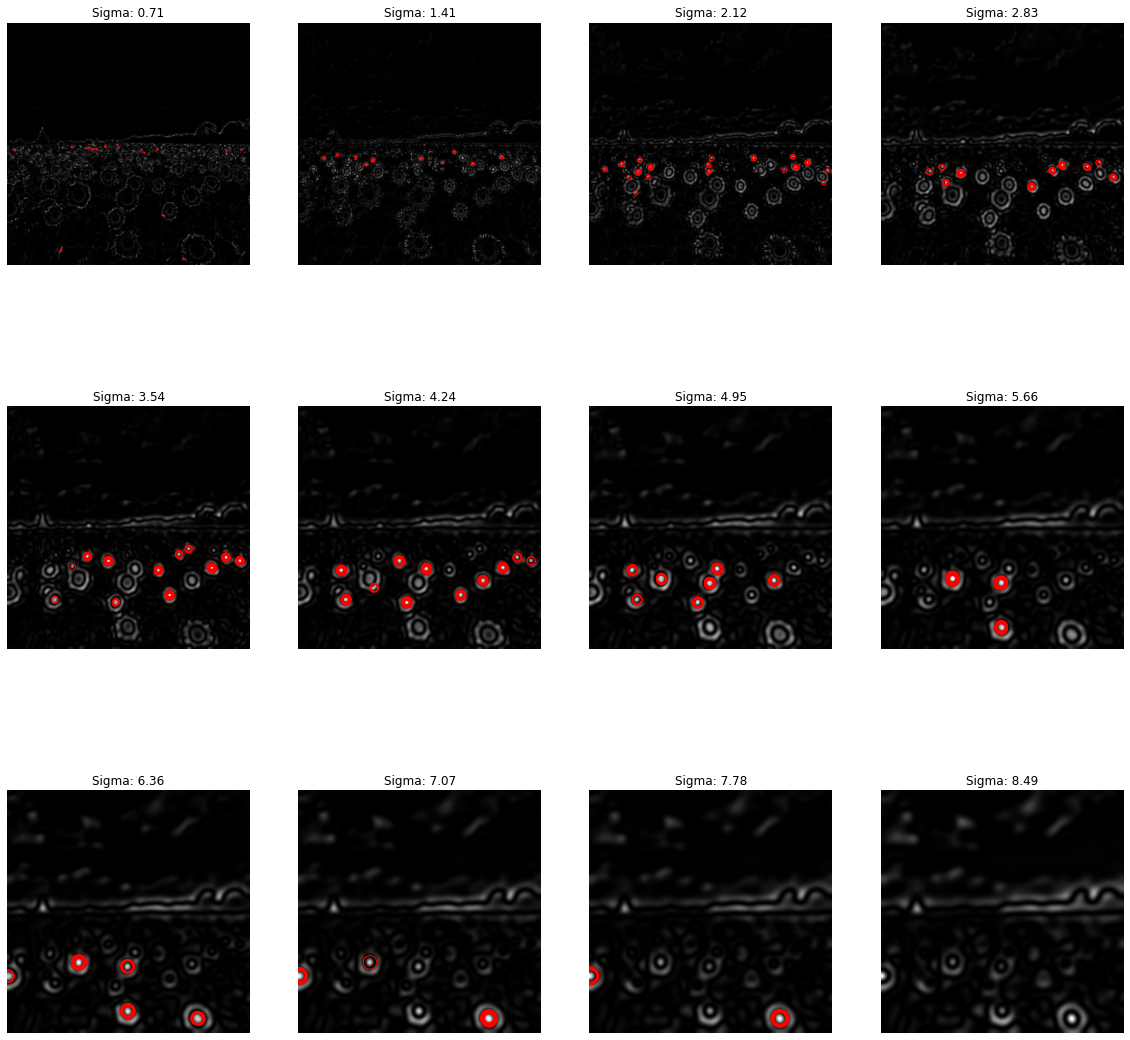

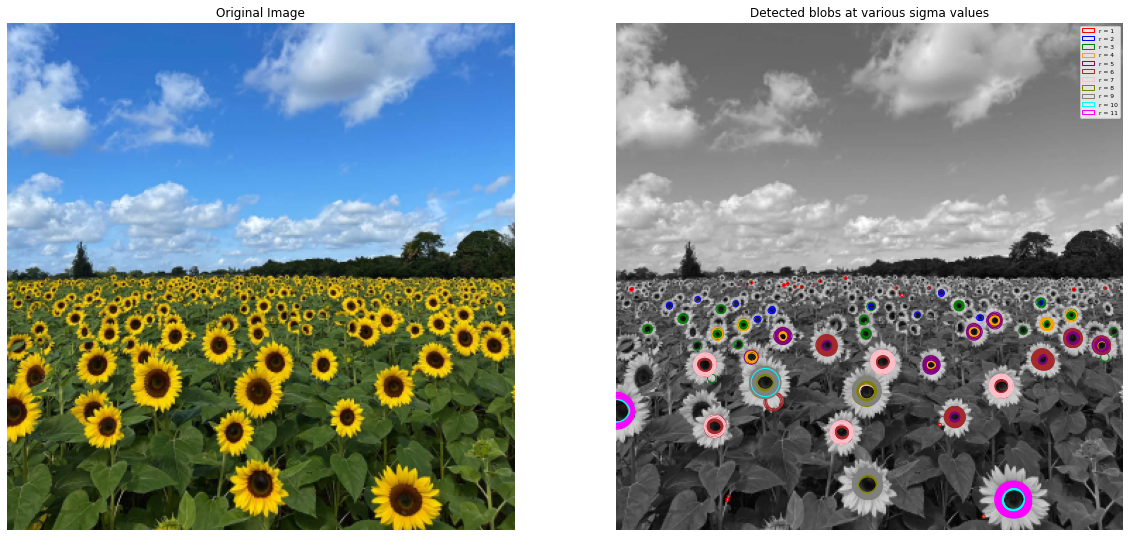

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


# Load the sunflower field image
image1 = cv.imread(filename=str('the_berry_farms_sunflower_field.jpeg'), flags=cv.IMREAD_REDUCED_COLOR_4)

# Display the original image
plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
plt.axis(False)
plt.show()

def LoG(sigma):
    hw = round(3 * sigma)
    X = np.arange(start=-hw, stop=hw + 1, step=1)
    Y = np.arange(start=-hw, stop=hw + 1, step=1)
    X, Y = np.meshgrid(X, Y)
    log = ((X**2 + Y**2) / (2 * sigma**2) - 1) * np.exp(-(X**2 + Y**2) / (2 * sigma**2)) / (np.pi * sigma**4)
    return log

def detect_max(img_log, threshold):
    coordinates = []
    h, w = img_log.shape
    k = 1
    for i in range(k, h - k):
        for j in range(k, w - k):
            slice_img = img_log[i - k:i + k + 1, j - k:j + k + 1]
            max_value = np.max(slice_img)
            if max_value >= threshold:
                x, y = np.unravel_index(slice_img.argmax(), shape=slice_img.shape)
                coordinates.append((i + x - k, j + y - k))
    return set(coordinates)

# Plot the images with circles
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
image1_gray = cv.cvtColor(image1, cv.COLOR_BGR2GRAY) / 255

# Finding local peaks for each sigma
for r, ax in enumerate(axes.flatten(), start=1):
    sigma = r / np.sqrt(2)
    LOG = sigma**2 * LoG(sigma)
    filtered_image = np.square(cv.filter2D(src=image1_gray, ddepth=-1, kernel=LOG))

    coordinates = detect_max(filtered_image, 0.09)

    ax.imshow(filtered_image, cmap='gray')
    ax.set_title(f'Sigma: {sigma:.2f}')
    ax.axis('off')

    for x, y in coordinates:
        c = plt.Circle((y, x), sigma * 1.414, color='red', linewidth=1, fill=False)
        ax.add_patch(c)

plt.show()

# Second visualization with color-coded circles for different sigmas
fig, axes = plt.subplots(1, 2, figsize=(20, 20))

axes[0].imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')

ax = axes[1]
ax.imshow(image1_gray, cmap='gray')
ax.grid(False)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'olive', 'gray', 'cyan', 'magenta']

patches = []
labels = []

for r in range(1, 12):
    sigma = r / np.sqrt(2)
    LOG = sigma**2 * LoG(sigma)
    img1_log = np.square(cv.filter2D(image1_gray, -1, LOG))

    coordinates = detect_max(img1_log, 0.09)

    for x, y in coordinates:
        c = plt.Circle((y, x), sigma * 1.414, color=colors[r-1], linewidth=1, fill=False)
        ax.add_patch(c)
    patches.append(c)
    labels.append(f'r = {r}')
    ax.plot()

ax.set_xlim(0, image1_gray.shape[1])
plt.axis('off')
ax.legend(patches, labels, loc='best', fontsize=6)
ax.set_title("Detected blobs at various sigma values")
plt.show()


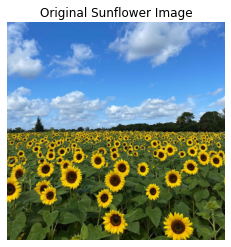

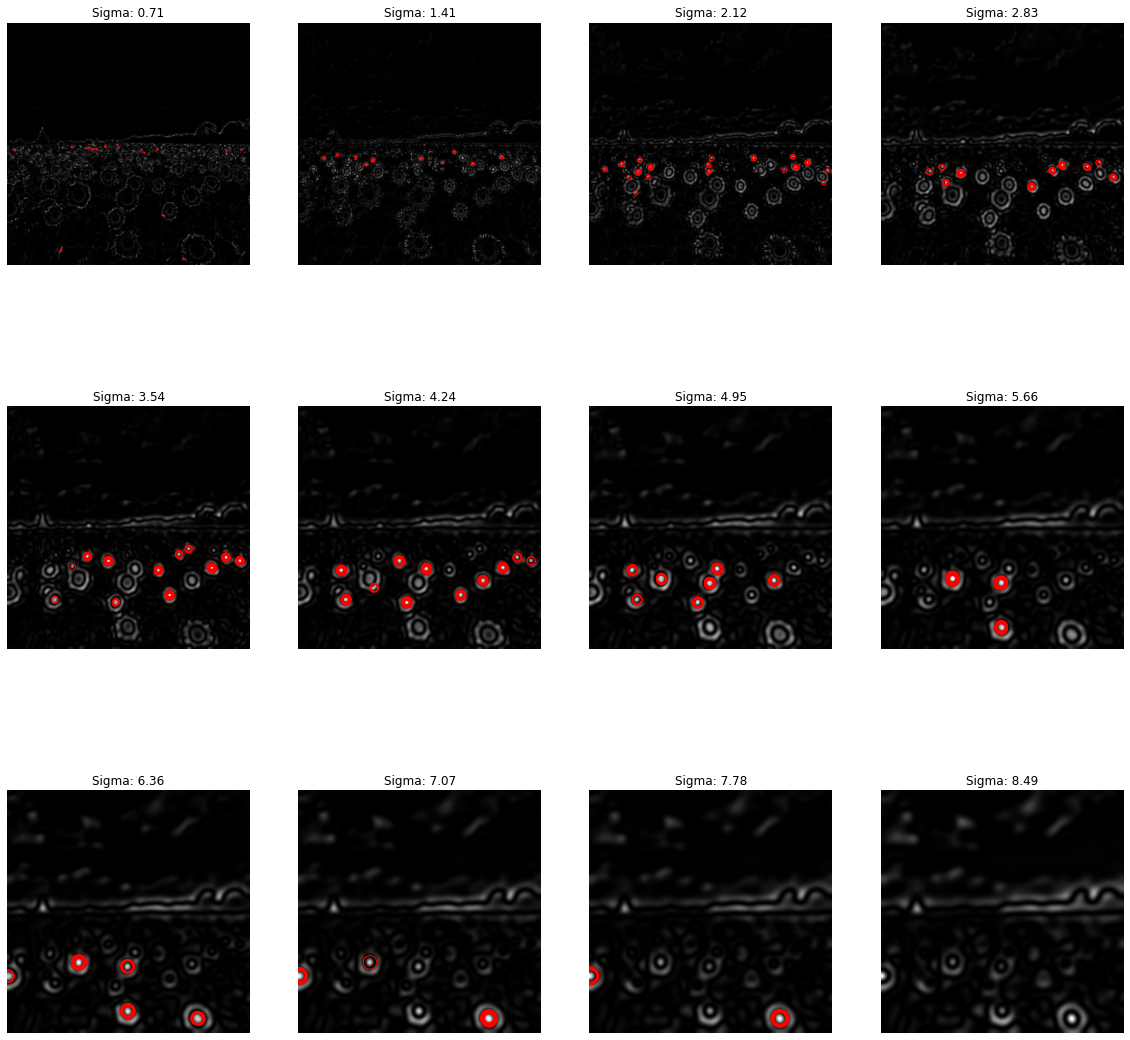

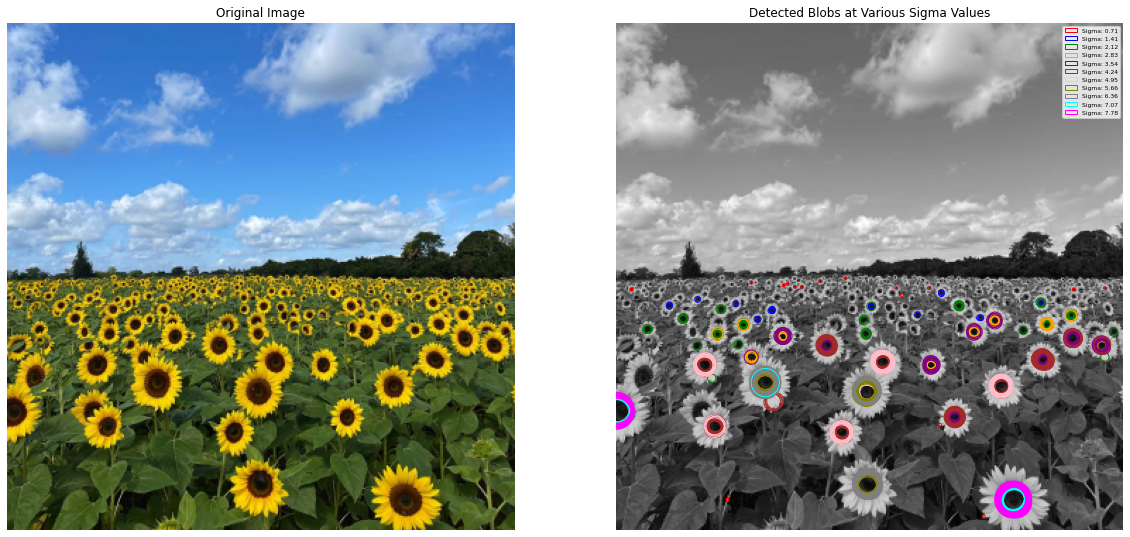

Largest circle detected has a radius of: 11.00 pixels at sigma: 7.78
Range of sigma values used: 0.71 to 8.49


In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the sunflower field image
image_sunflower = cv.imread(filename=str('the_berry_farms_sunflower_field.jpeg'), flags=cv.IMREAD_REDUCED_COLOR_4)

# Display the original image
plt.imshow(cv.cvtColor(image_sunflower, cv.COLOR_BGR2RGB))
plt.axis(False)
plt.title("Original Sunflower Image")
plt.show()

# Define Laplacian of Gaussian function for blob detection
def laplacian_of_gaussian(sigma):
    filter_radius = round(3 * sigma)
    X, Y = np.meshgrid(np.arange(-filter_radius, filter_radius + 1), 
                       np.arange(-filter_radius, filter_radius + 1))
    LoG_filter = ((X**2 + Y**2) / (2 * sigma**2) - 1) * np.exp(-(X**2 + Y**2) / (2 * sigma**2)) / (np.pi * sigma**4)
    return LoG_filter

# Function to detect local maxima in the filtered image
def find_local_maxima(log_image, threshold):
    detected_points = []
    img_height, img_width = log_image.shape
    neighborhood_radius = 1
    
    for i in range(neighborhood_radius, img_height - neighborhood_radius):
        for j in range(neighborhood_radius, img_width - neighborhood_radius):
            local_window = log_image[i - neighborhood_radius:i + neighborhood_radius + 1, 
                                     j - neighborhood_radius:j + neighborhood_radius + 1]
            if np.max(local_window) >= threshold:
                y_offset, x_offset = np.unravel_index(local_window.argmax(), shape=local_window.shape)
                detected_points.append((i + y_offset - neighborhood_radius, j + x_offset - neighborhood_radius))
    
    return set(detected_points)

# Prepare the image for processing
image_gray = cv.cvtColor(image_sunflower, cv.COLOR_BGR2GRAY) / 255

# Variables to track the largest circle
largest_circle_radius = 0
largest_circle_sigma = 0

# Plot detected blobs for a range of sigma values
sigma_values = []
fig, axes = plt.subplots(3, 4, figsize=(20, 20))

for idx, ax in enumerate(axes.flatten(), start=1):
    sigma = idx / np.sqrt(2)
    sigma_values.append(sigma)
    
    # Apply Laplacian of Gaussian filtering
    LoG_kernel = sigma**2 * laplacian_of_gaussian(sigma)
    filtered_image = np.square(cv.filter2D(src=image_gray, ddepth=-1, kernel=LoG_kernel))
    
    # Detect local maxima
    detected_points = find_local_maxima(filtered_image, 0.09)
    
    # Track the largest circle based on sigma (radius)
    if detected_points:
        current_radius = sigma * 1.414  # Approximate radius based on sigma
        if current_radius > largest_circle_radius:
            largest_circle_radius = current_radius
            largest_circle_sigma = sigma

    # Display the filtered image with detected circles
    ax.imshow(filtered_image, cmap='gray')
    ax.set_title(f'Sigma: {sigma:.2f}')
    ax.axis('off')

    for y, x in detected_points:
        circle = plt.Circle((x, y), sigma * 1.414, color='red', linewidth=1, fill=False)
        ax.add_patch(circle)

plt.show()

# Second visualization with color-coded circles for different sigma values
fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Show the original image
axes[0].imshow(cv.cvtColor(image_sunflower, cv.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')

# Show grayscale image with color-coded circles for detected blobs
ax = axes[1]
ax.imshow(image_gray, cmap='gray')
ax.grid(False)

# Define colors for different sigma values
color_palette = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 
                 'pink', 'olive', 'gray', 'cyan', 'magenta']

patches = []
labels = []

for idx in range(1, 12):
    sigma = idx / np.sqrt(2)
    LoG_kernel = sigma**2 * laplacian_of_gaussian(sigma)
    filtered_image_log = np.square(cv.filter2D(image_gray, -1, LoG_kernel))
    
    # Detect local maxima
    detected_points = find_local_maxima(filtered_image_log, 0.09)
    
    # Draw circles around the detected points
    for y, x in detected_points:
        circle = plt.Circle((x, y), sigma * 1.414, color=color_palette[idx-1], linewidth=1, fill=False)
        ax.add_patch(circle)
    
    patches.append(circle)
    labels.append(f'Sigma: {sigma:.2f}')
    
# Plot legend
ax.set_xlim(0, image_gray.shape[1])
plt.axis('off')
ax.legend(patches, labels, loc='best', fontsize=6)
ax.set_title("Detected Blobs at Various Sigma Values")
plt.show()

# Report the parameters of the largest circle (radius and corresponding sigma)
print(f"Largest circle detected has a radius of: {largest_circle_radius:.2f} pixels at sigma: {largest_circle_sigma:.2f}")

# Report the range of sigma values used
print(f"Range of sigma values used: {min(sigma_values):.2f} to {max(sigma_values):.2f}")
